In [118]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

<h1><b>Data Explority</b></h1>

In [119]:
titanic = pd.read_csv('C:\\Users\\bonagiri akanksha\\Downloads\\tested.csv')


In [120]:
# Display first few rows
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [121]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [122]:
# Checking the columns in the dataset
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [123]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<h1><b>Handling Missing Values</b></h1>

In [124]:
titanic.duplicated().sum()

0

In [125]:
titanic=titanic.drop(columns="Cabin")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [126]:
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)
titanic["Age"].isna().sum()

0

In [127]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [128]:
titanic["Fare"].fillna(titanic["Fare"].median(),inplace=True)
titanic["Fare"].isna().sum()

0

In [129]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<h1><b>Data Analysis</b></h1>

In [130]:
Survived=titanic["Survived"].value_counts()
Survived

0    266
1    152
Name: Survived, dtype: int64

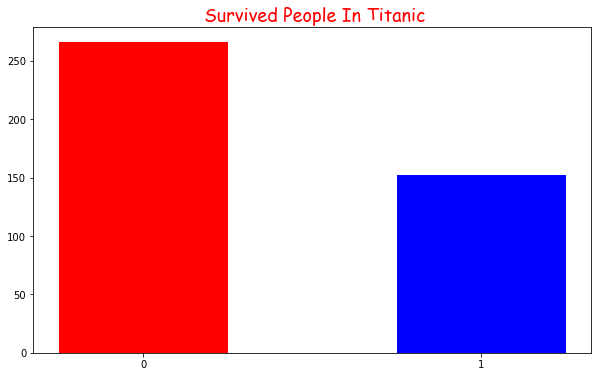

In [131]:
plt.figure(figsize=(10,6))
plt.title(" Survived People In Titanic",fontdict={"fontname":"Comic Sans MS","fontsize":18},color="Red")
plt.bar(Survived.index,Survived.values,width=0.5,color=["red","blue"])
plt.xticks(np.arange(0,2,1))
plt.show()

In [132]:
Class=titanic["Pclass"].value_counts()
Class

3    218
1    107
2     93
Name: Pclass, dtype: int64

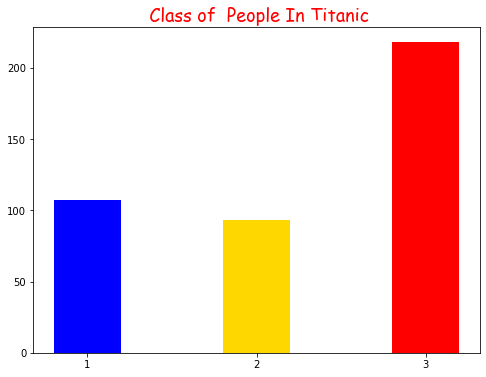

In [133]:
plt.figure(figsize=(8,6))
plt.title(" Class of  People In Titanic",fontdict={"fontname":"Comic Sans MS","fontsize":18},color="Red")
plt.bar(Class.index,Class.values,width=0.4,color=["red","blue","gold"])
plt.xticks(np.arange(1,4,1))
plt.show()

In [134]:
sex=titanic["Sex"].value_counts()
sex

male      266
female    152
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

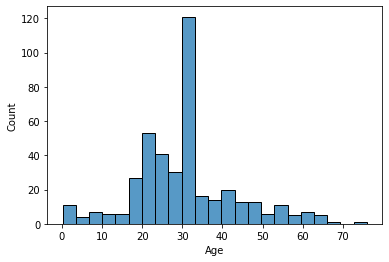

In [135]:
sns.histplot(titanic["Age"])

In [136]:
titanic.drop(['Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)


In [137]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


<h1><b>RandomForestClassifier</b></h1>

In [115]:
titanic = pd.get_dummies(titanic, drop_first=True)

In [82]:
x = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
Scale=StandardScaler()
x_train=Scale.fit_transform(x_train)
x_test=Scale.fit_transform(x_test)

In [85]:
model=RandomForestClassifier()

In [86]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [138]:
y_predict=model.predict(x_test)

<h1><b>Evaluate the model</b></h1>

In [139]:
print("Accuracy ",accuracy_score(y_test,y_predict))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_predict))
print("Classification Report",classification_report(y_test,y_predict))

Accuracy  1.0
Confusion Matrix : 
 [[50  0]
 [ 0 34]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

